Load the fake.tsv and true.tsv files to run the notebook :)

#Creating the DataFrames and basic data manipulation to get it ready to analyze later





In [1]:
#loading our data frame according to fake/new

import json
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing


fake_df = pd.read_table(r'C:\Users\alber\Desktop\Make Believe Diciembre\Data\Data Linguistic Analysis\fake.tsv', delimiter = '\t')
true_df = pd.read_table(r'C:\Users\alber\Desktop\Make Believe Diciembre\Data\Data Linguistic Analysis\true.tsv', delimiter = '\t')

# print("FAKE \n ", fake_df.describe())
# print("TRUE \n ", true_df.describe())

# print("FAKE DISTRIBUTIONS \n", fake_df.hist(bins=40, figsize=(50, 25)))
# print("TRUE DISTRIBUTIONS \n",true_df.hist(bins=40, figsize=(50, 25)))


In [2]:
fake_df.pop("text_key") # categorical value will trigger an error when normalizing so we take this column out
true_df.pop("text_key")

true_df["Polarity"] = "TRUE"
fake_df["Polarity"] = "Fake"

dfs = [fake_df, true_df]
true_and_fake = pd.concat(dfs, axis = 0)

In [3]:
true_and_fake

,id,DESPC,DESSC,DESWC,DESPL,DESPLd,DESPLw,DESSL,DESSLd,DESWLsy,...,WORD_PROPERTY_WRDHYPn,WORD_PROPERTY_WRDHYPv,WORD_PROPERTY_WRDHYPnv,WORD_PROPERTY_AOA,WORD_PROPERTY_AOA_MAX,WORD_PROPERTY_CONCRETENESS,WORD_PROPERTY_PREVALENCE,WORD_PROPERTY_PREVALENCE_MIN,WORD_SET_INCIDENCE_C4_COMMON_WORDS,Polarity
0,1,5.0,2.0,98.0,1.000000,0.000000,48.500000,49.000000,1.414214,1.908163,...,5.857143,1.250000,4.181818,6.196173,12.630000,2.523704,2.316489,2.316489,0.204082,Fake
1,2,3.0,5.0,126.0,2.500000,2.121320,60.500000,25.200000,13.535139,1.285714,...,5.916667,1.421053,3.161290,4.892755,11.810000,2.688333,2.317815,2.317815,0.111111,Fake
2,3,3.0,6.0,132.0,3.000000,2.828427,65.000000,22.000000,11.933147,1.348485,...,6.433333,0.941176,4.446809,5.274480,11.699415,2.743217,2.313201,2.313201,0.174242,Fake
3,4,3.0,5.0,140.0,2.500000,2.121320,69.500000,28.000000,10.653638,1.342857,...,6.423077,0.923077,4.589744,5.012647,10.280000,2.840101,2.274963,2.274963,0.135714,Fake
4,5,3.0,7.0,137.0,3.500000,3.535534,65.000000,19.571429,6.827814,1.306569,...,6.818182,1.550000,4.309524,5.335149,14.720000,2.391863,2.289871,2.289871,0.175182,Fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,3.0,5.0,137.0,2.500000,2.121320,66.500000,27.400000,9.449868,1.394161,...,6.230769,2.071429,4.775000,5.534232,11.786635,2.695100,2.292326,2.292326,0.167883,TRUE
236,237,9.0,4.0,131.0,0.800000,0.447214,25.400000,32.750000,20.172176,1.244275,...,6.043478,0.823529,3.825000,5.002707,11.940000,2.602743,2.319229,2.319229,0.129771,TRUE
237,238,5.0,2.0,94.0,0.666667,0.577350,30.666667,47.000000,1.414214,1.468085,...,6.545455,1.583333,4.794118,5.695342,14.620000,2.855897,2.310864,2.310864,0.106383,TRUE
238,239,3.0,10.0,199.0,5.000000,4.242641,92.500000,19.900000,10.650509,1.366834,...,6.178571,0.588235,4.066667,4.998212,12.890000,2.628047,2.312582,2.312582,0.090452,TRUE


In [4]:
#NORMALIZING data for the fake_news df

df_max_scaled = true_and_fake
for column in true_and_fake.columns[:-1]:

  df_max_scaled[column]=(true_and_fake[column]-true_and_fake[column].min())/(true_and_fake[column].max()-true_and_fake[column].min())

# # view normalized data

# print(display(fake_max_scaled))

# #normalizing data for the true_news df

# true_max_scaled = pd.DataFrame()
# for column in fake_df.columns:
#   true_max_scaled[column]=(true_df[column]-true_df[column].min())/(true_df[column].max()-true_df[column].min())

# # view normalized data

# print(display(true_max_scaled))

#the normalized dfs are saved in fake_max_scaled and true_max_scaled

true_max_scaled = df_max_scaled[df_max_scaled["Polarity"] == "TRUE"]

fake_max_scaled = df_max_scaled[df_max_scaled["Polarity"] == "Fake"]

In [5]:
true_max_scaled.transpose()  #for visual reference

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
id,0.0,0.004184,0.008368,0.012552,0.016736,0.020921,0.025105,0.029289,0.033473,0.037657,...,0.962343,0.966527,0.970711,0.974895,0.979079,0.983264,0.987448,0.991632,0.995816,1.0
DESPC,0.666667,0.222222,0.222222,0.888889,0.222222,0.222222,0.777778,0.222222,0.666667,0.444444,...,0.222222,1.0,0.666667,0.777778,0.888889,0.222222,0.888889,0.444444,0.222222,0.222222
DESSC,0.117647,0.294118,1.0,0.235294,0.294118,0.294118,0.294118,0.235294,0.117647,0.117647,...,0.352941,0.117647,0.176471,0.117647,0.176471,0.176471,0.117647,0.0,0.470588,0.176471
DESWC,0.207692,0.484615,1.0,0.176923,0.230769,0.3,0.196154,0.273077,0.257692,0.203846,...,0.373077,0.284615,0.2,0.342308,0.269231,0.296154,0.273077,0.130769,0.534615,0.138462
DESPL,0.027027,0.22973,0.716216,0.043243,0.22973,0.22973,0.087838,0.189189,0.027027,0.054054,...,0.27027,0.010811,0.081081,0.027027,0.047297,0.148649,0.010811,0.0,0.351351,0.148649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WORD_PROPERTY_CONCRETENESS,0.375604,0.256903,0.288263,0.577369,0.616899,0.530238,0.748768,0.343036,0.620177,0.555613,...,0.442014,0.433727,0.762086,0.413266,0.865474,0.621988,0.499129,0.83589,0.53279,0.534365
WORD_PROPERTY_PREVALENCE,0.37746,0.639813,0.673364,0.761018,0.752944,0.142961,0.46652,0.518825,0.792996,0.670703,...,0.563175,0.658694,0.805858,0.43964,0.773166,0.530017,0.691053,0.640981,0.651265,0.574802
WORD_PROPERTY_PREVALENCE_MIN,0.37746,0.639813,0.673364,0.761018,0.752944,0.142961,0.46652,0.518825,0.792996,0.670703,...,0.563175,0.658694,0.805858,0.43964,0.773166,0.530017,0.691053,0.640981,0.651265,0.574802
WORD_SET_INCIDENCE_C4_COMMON_WORDS,0.511111,0.511111,0.477184,0.130687,0.356015,0.275096,0.238646,0.232886,0.578279,0.55915,...,0.269083,0.464814,0.358785,0.266497,0.379876,0.516772,0.33944,0.230619,0.156495,0.268774


In [6]:
true_max_scaled.columns

Index(['id', 'DESPC', 'DESSC', 'DESWC', 'DESPL', 'DESPLd', 'DESPLw', 'DESSL',
       'DESSLd', 'DESWLsy', 'DESWLsyd', 'DESWLlt', 'DESWLltd', 'LDTTRc',
       'LDTTRa', 'LDMTLD', 'LDHDD', 'SYNLE', 'SYNNP', 'SYNMEDpos', 'SYNMEDwrd',
       'SYNMEDlem', 'SYNSTRUTa', 'SYNSTRUTt', 'RDFRE', 'READFKGL',
       'TOKEN_ATTRIBUTE_RATIO_ALHPA', 'TOKEN_ATTRIBUTE_RATIO_DIGIT',
       'TOKEN_ATTRIBUTE_RATIO_PUNCT', 'TOKEN_ATTRIBUTE_RATIO_URL',
       'TOKEN_ATTRIBUTE_RATIO_EMAIL', 'WORD_SET_INCIDENCE_WRDPRP1s',
       'WORD_SET_INCIDENCE_WRDPRP1p', 'WORD_SET_INCIDENCE_WRDPRP2',
       'WORD_SET_INCIDENCE_WRDPRP3s', 'WORD_SET_INCIDENCE_WRDPRP3p',
       'WORD_SET_INCIDENCE_CNCCaus', 'WORD_SET_INCIDENCE_CNCLogic',
       'WORD_SET_INCIDENCE_CNCTemp', 'WORD_SET_INCIDENCE_CNCAdd',
       'WORD_SET_INCIDENCE_CNCPos', 'WORD_SET_INCIDENCE_CNCNeg',
       'WORD_PROPERTY_WRDNOUN', 'WORD_PROPERTY_WRDVERB',
       'WORD_PROPERTY_WRDADJ', 'WORD_PROPERTY_WRDADV', 'WORD_PROPERTY_WRDFRQc',
       'WORD_PROPERTY_WR

# Calculating Shapiro p-value

In [7]:
#calculating shapiro test, which indicates the probability of a distribution following normal curve

arrays_true = true_max_scaled.drop(labels="Polarity", axis=1).transpose()
arrays_fake = fake_max_scaled.drop(labels="Polarity", axis=1).transpose()

dic_arrays_true = {}
dic_arrays_fake = {}
shapiro_pvalue_fake = []
shapiro_pvalue_true = [] #list of the p.values, the index will be the same for the list and the feature

for i in range(len(arrays_true)):

  dic_arrays_true["array{}".format(i)] = np.array(arrays_true.iloc[i])
  res = stats.shapiro(dic_arrays_true["array{}".format(i)])
  shapiro_pvalue_true.append(res.pvalue)

  # print("shapiro true:", res.pvalue)
  #print(shapiro_pvalue_true)


for i in range(len(arrays_fake)):

  dic_arrays_fake["array{}".format(i)] = np.array(arrays_fake.iloc[i])
  res = stats.shapiro(dic_arrays_fake["array{}".format(i)])
  shapiro_pvalue_fake.append(res.pvalue)

  #print("shapiro fake:", res.pvalue)


# comparing shapiro tests for fake-true can tell us which features follow a normal distribution in fake news, which features follow normal distribution in real news

# for i in range(len(shapiro_pvalue_true)):
#   print("for shapiro test in index {}: shapiro fake".format(i), shapiro_pvalue_fake[i], "vs shapiro true", shapiro_pvalue_true[i])

# we know the indexes are the same because the result of the 'index' characteristic is the same for true and fake news

In [8]:
for i in range(len(shapiro_pvalue_true)):
  print("for shapiro test in index {}: shapiro fake".format(i), shapiro_pvalue_fake[i], "vs shapiro true", shapiro_pvalue_true[i])

for shapiro test in index 0: shapiro fake 7.521604743487842e-07 vs shapiro true 7.521604743487842e-07
for shapiro test in index 1: shapiro fake 2.2636709875816473e-15 vs shapiro true 4.932135209007862e-17
for shapiro test in index 2: shapiro fake 4.6990106250532904e-11 vs shapiro true 1.915331567935337e-14
for shapiro test in index 3: shapiro fake 1.3494164119443042e-10 vs shapiro true 1.618891409815859e-10
for shapiro test in index 4: shapiro fake 6.2246414179480385e-15 vs shapiro true 1.5595453734299457e-14
for shapiro test in index 5: shapiro fake 1.0 vs shapiro true 2.2536026245749906e-17
for shapiro test in index 6: shapiro fake 1.8435441809907312e-16 vs shapiro true 2.421042255562611e-10
for shapiro test in index 7: shapiro fake 1.4450753926809057e-09 vs shapiro true 1.0581524065855774e-06
for shapiro test in index 8: shapiro fake 8.210849773604423e-05 vs shapiro true 2.9105725804761534e-14
for shapiro test in index 9: shapiro fake 0.003175197634845972 vs shapiro true 0.000262374

In [9]:
# get the bulk of text to convert into the dictionary with the pvalues

# for col in true_max_scaled.columns:
#     print(col)

listaza = '''id
DESPC
DESSC
DESWC
DESPL
DESPLd
DESPLw
DESSL
DESSLd
DESWLsy
DESWLsyd
DESWLlt
DESWLltd
LDTTRc
LDTTRa
LDMTLD
LDHDD
SYNLE
SYNNP
SYNMEDpos
SYNMEDwrd
SYNMEDlem
SYNSTRUTa
SYNSTRUTt
RDFRE
READFKGL
TOKEN_ATTRIBUTE_RATIO_ALHPA
TOKEN_ATTRIBUTE_RATIO_DIGIT
TOKEN_ATTRIBUTE_RATIO_PUNCT
TOKEN_ATTRIBUTE_RATIO_URL
TOKEN_ATTRIBUTE_RATIO_EMAIL
WORD_SET_INCIDENCE_WRDPRP1s
WORD_SET_INCIDENCE_WRDPRP1p
WORD_SET_INCIDENCE_WRDPRP2
WORD_SET_INCIDENCE_WRDPRP3s
WORD_SET_INCIDENCE_WRDPRP3p
WORD_SET_INCIDENCE_CNCCaus
WORD_SET_INCIDENCE_CNCLogic
WORD_SET_INCIDENCE_CNCTemp
WORD_SET_INCIDENCE_CNCAdd
WORD_SET_INCIDENCE_CNCPos
WORD_SET_INCIDENCE_CNCNeg
WORD_PROPERTY_WRDNOUN
WORD_PROPERTY_WRDVERB
WORD_PROPERTY_WRDADJ
WORD_PROPERTY_WRDADV
WORD_PROPERTY_WRDFRQc
WORD_PROPERTY_WRDFRQa
WORD_PROPERTY_WRDFRQmc
WORD_PROPERTY_WRDFAMc
WORD_PROPERTY_WRDCNCc
WORD_PROPERTY_WRDIMGc
WORD_PROPERTY_WRDMEAc
WORD_PROPERTY_WRDPOLc
WORD_PROPERTY_WRDHYPn
WORD_PROPERTY_WRDHYPv
WORD_PROPERTY_WRDHYPnv
WORD_PROPERTY_AOA
WORD_PROPERTY_AOA_MAX
WORD_PROPERTY_CONCRETENESS
WORD_PROPERTY_PREVALENCE
WORD_PROPERTY_PREVALENCE_MIN
WORD_SET_INCIDENCE_C4_COMMON_WORDS'''

dict_ids = {}

dic_list = []
for word in listaza.split():
  dic_list.append(word)

dict_fake_pvalues = {dic_list[i]: shapiro_pvalue_fake[i] for i in range(len(dic_list))}

dict_true_pvalues = {dic_list[i]: shapiro_pvalue_true[i] for i in range(len(dic_list))}

# print(dict_fake_pvalues)

# now we have every feature associated with its pvalue in two dictionaries.

# if p value > 0.005, we accept H0 = the metric follows a normal curve in the fake/real subset of the corpus


# Adding the Shapiro p-value to our DFs and merging them

In [10]:
# adding the shapiro pvalue to the true/false scaled dataframe

# adding the polarity

# when we combine both of these into one df, the indexes will be repeated,
# that is, the columns will be 0-240 and a column Shapiro Pval Fake and then another 0-240 and a column Shapiro Pval True
# so we can distinguish the indexes  by the polarity row which we are adding at the end



arrays_fake['Shapiro pval Fake'] = shapiro_pvalue_fake

arrays_fake.loc[len(arrays_fake)] = "Fake"
arrays_fake = arrays_fake.rename(index={63 : "Polarity"})

arrays_true['Shapiro pval True'] = shapiro_pvalue_true

arrays_true.loc[len(arrays_true)] = "True"
arrays_true = arrays_true.rename(index={63: "Polarity"})





In [11]:
arrays_true

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,Shapiro pval True
id,0.0,0.004184,0.008368,0.012552,0.016736,0.020921,0.025105,0.029289,0.033473,0.037657,...,0.966527,0.970711,0.974895,0.979079,0.983264,0.987448,0.991632,0.995816,1.0,0.000001
DESPC,0.666667,0.222222,0.222222,0.888889,0.222222,0.222222,0.777778,0.222222,0.666667,0.444444,...,1.0,0.666667,0.777778,0.888889,0.222222,0.888889,0.444444,0.222222,0.222222,0.0
DESSC,0.117647,0.294118,1.0,0.235294,0.294118,0.294118,0.294118,0.235294,0.117647,0.117647,...,0.117647,0.176471,0.117647,0.176471,0.176471,0.117647,0.0,0.470588,0.176471,0.0
DESWC,0.207692,0.484615,1.0,0.176923,0.230769,0.3,0.196154,0.273077,0.257692,0.203846,...,0.284615,0.2,0.342308,0.269231,0.296154,0.273077,0.130769,0.534615,0.138462,0.0
DESPL,0.027027,0.22973,0.716216,0.043243,0.22973,0.22973,0.087838,0.189189,0.027027,0.054054,...,0.010811,0.081081,0.027027,0.047297,0.148649,0.010811,0.0,0.351351,0.148649,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WORD_PROPERTY_CONCRETENESS,0.375604,0.256903,0.288263,0.577369,0.616899,0.530238,0.748768,0.343036,0.620177,0.555613,...,0.433727,0.762086,0.413266,0.865474,0.621988,0.499129,0.83589,0.53279,0.534365,0.06507
WORD_PROPERTY_PREVALENCE,0.37746,0.639813,0.673364,0.761018,0.752944,0.142961,0.46652,0.518825,0.792996,0.670703,...,0.658694,0.805858,0.43964,0.773166,0.530017,0.691053,0.640981,0.651265,0.574802,0.000379
WORD_PROPERTY_PREVALENCE_MIN,0.37746,0.639813,0.673364,0.761018,0.752944,0.142961,0.46652,0.518825,0.792996,0.670703,...,0.658694,0.805858,0.43964,0.773166,0.530017,0.691053,0.640981,0.651265,0.574802,0.000379
WORD_SET_INCIDENCE_C4_COMMON_WORDS,0.511111,0.511111,0.477184,0.130687,0.356015,0.275096,0.238646,0.232886,0.578279,0.55915,...,0.464814,0.358785,0.266497,0.379876,0.516772,0.33944,0.230619,0.156495,0.268774,0.600734


In [12]:
arrays_fake


,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,Shapiro pval Fake
id,0.0,0.004184,0.008368,0.012552,0.016736,0.020921,0.025105,0.029289,0.033473,0.037657,...,0.966527,0.970711,0.974895,0.979079,0.983264,0.987448,0.991632,0.995816,1.0,0.000001
DESPC,0.444444,0.222222,0.222222,0.222222,0.222222,0.0,0.222222,0.444444,0.444444,0.444444,...,0.222222,0.111111,0.0,0.222222,0.222222,0.444444,0.444444,0.222222,0.444444,0.0
DESSC,0.0,0.176471,0.235294,0.176471,0.294118,0.117647,0.176471,0.176471,0.235294,0.294118,...,0.235294,0.058824,0.235294,0.352941,0.058824,0.176471,0.117647,0.117647,0.0,0.0
DESWC,0.146154,0.253846,0.276923,0.307692,0.296154,0.084615,0.119231,0.253846,0.338462,0.246154,...,0.157692,0.05,0.426923,0.592308,0.115385,0.126923,0.069231,0.265385,0.123077,0.0
DESPL,0.027027,0.148649,0.189189,0.148649,0.22973,0.27027,0.148649,0.148649,0.189189,0.22973,...,0.189189,0.067568,0.432432,0.27027,0.067568,0.148649,0.108108,0.108108,0.027027,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WORD_PROPERTY_CONCRETENESS,0.393986,0.612986,0.685996,0.814876,0.218604,0.39081,0.55953,0.820305,0.356784,0.222334,...,0.374427,0.522085,0.259766,0.354722,0.391824,0.56415,0.564903,0.66386,0.138854,0.358169
WORD_PROPERTY_PREVALENCE,0.674648,0.682585,0.654967,0.426085,0.51532,0.601772,0.647259,0.683572,0.73943,0.361384,...,0.3655,0.61593,0.628425,0.549394,0.65899,0.658817,0.618456,0.886398,0.774578,0.002348
WORD_PROPERTY_PREVALENCE_MIN,0.674648,0.682585,0.654967,0.426085,0.51532,0.601772,0.647259,0.683572,0.73943,0.361384,...,0.3655,0.61593,0.628425,0.549394,0.65899,0.658817,0.618456,0.886398,0.774578,0.002348
WORD_SET_INCIDENCE_C4_COMMON_WORDS,0.685198,0.252618,0.54636,0.367094,0.550734,0.416541,0.349198,0.511111,0.553029,0.448572,...,0.426653,0.691702,0.524716,0.518359,0.717905,0.436065,0.153198,0.565214,0.645977,0.726251


In [13]:
# combining the different tables into a sigle one


true_and_fake = pd.concat([arrays_fake, arrays_true], axis = 1)

true_and_fake



,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,Shapiro pval True
id,0.0,0.004184,0.008368,0.012552,0.016736,0.020921,0.025105,0.029289,0.033473,0.037657,...,0.966527,0.970711,0.974895,0.979079,0.983264,0.987448,0.991632,0.995816,1.0,0.000001
DESPC,0.444444,0.222222,0.222222,0.222222,0.222222,0.0,0.222222,0.444444,0.444444,0.444444,...,1.0,0.666667,0.777778,0.888889,0.222222,0.888889,0.444444,0.222222,0.222222,0.0
DESSC,0.0,0.176471,0.235294,0.176471,0.294118,0.117647,0.176471,0.176471,0.235294,0.294118,...,0.117647,0.176471,0.117647,0.176471,0.176471,0.117647,0.0,0.470588,0.176471,0.0
DESWC,0.146154,0.253846,0.276923,0.307692,0.296154,0.084615,0.119231,0.253846,0.338462,0.246154,...,0.284615,0.2,0.342308,0.269231,0.296154,0.273077,0.130769,0.534615,0.138462,0.0
DESPL,0.027027,0.148649,0.189189,0.148649,0.22973,0.27027,0.148649,0.148649,0.189189,0.22973,...,0.010811,0.081081,0.027027,0.047297,0.148649,0.010811,0.0,0.351351,0.148649,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WORD_PROPERTY_CONCRETENESS,0.393986,0.612986,0.685996,0.814876,0.218604,0.39081,0.55953,0.820305,0.356784,0.222334,...,0.433727,0.762086,0.413266,0.865474,0.621988,0.499129,0.83589,0.53279,0.534365,0.06507
WORD_PROPERTY_PREVALENCE,0.674648,0.682585,0.654967,0.426085,0.51532,0.601772,0.647259,0.683572,0.73943,0.361384,...,0.658694,0.805858,0.43964,0.773166,0.530017,0.691053,0.640981,0.651265,0.574802,0.000379
WORD_PROPERTY_PREVALENCE_MIN,0.674648,0.682585,0.654967,0.426085,0.51532,0.601772,0.647259,0.683572,0.73943,0.361384,...,0.658694,0.805858,0.43964,0.773166,0.530017,0.691053,0.640981,0.651265,0.574802,0.000379
WORD_SET_INCIDENCE_C4_COMMON_WORDS,0.685198,0.252618,0.54636,0.367094,0.550734,0.416541,0.349198,0.511111,0.553029,0.448572,...,0.464814,0.358785,0.266497,0.379876,0.516772,0.33944,0.230619,0.156495,0.268774,0.600734


In [14]:
true_and_fake.transpose()

,id,DESPC,DESSC,DESWC,DESPL,DESPLd,DESPLw,DESSL,DESSLd,DESWLsy,...,WORD_PROPERTY_WRDHYPn,WORD_PROPERTY_WRDHYPv,WORD_PROPERTY_WRDHYPnv,WORD_PROPERTY_AOA,WORD_PROPERTY_AOA_MAX,WORD_PROPERTY_CONCRETENESS,WORD_PROPERTY_PREVALENCE,WORD_PROPERTY_PREVALENCE_MIN,WORD_SET_INCIDENCE_C4_COMMON_WORDS,Polarity
0,0.0,0.444444,0.0,0.146154,0.027027,0.0,0.151143,0.682139,0.0,1.0,...,0.404405,0.233333,0.363359,0.536598,0.396186,0.393986,0.674648,0.674648,0.685198,Fake
1,0.004184,0.222222,0.176471,0.253846,0.148649,0.176471,0.201948,0.249849,0.248429,0.109532,...,0.420646,0.278947,0.072002,0.05709,0.309322,0.612986,0.682585,0.682585,0.252618,Fake
2,0.008368,0.222222,0.235294,0.276923,0.189189,0.235294,0.220999,0.191726,0.215594,0.19933,...,0.561619,0.15098,0.439013,0.197521,0.297608,0.685996,0.654967,0.654967,0.54636,Fake
3,0.012552,0.222222,0.176471,0.307692,0.148649,0.176471,0.240051,0.300706,0.18937,0.191279,...,0.55882,0.146154,0.47982,0.101196,0.147246,0.814876,0.426085,0.426085,0.367094,Fake
4,0.016736,0.222222,0.294118,0.296154,0.22973,0.294118,0.220999,0.147614,0.110956,0.139367,...,0.666625,0.313333,0.399818,0.21984,0.617585,0.218604,0.51532,0.51532,0.550734,Fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0.987448,0.888889,0.117647,0.273077,0.010811,0.037203,0.053345,0.386983,0.38446,0.050249,...,0.455246,0.119608,0.261489,0.09754,0.323093,0.499129,0.691053,0.691053,0.33944,True
237,0.991632,0.444444,0.0,0.130769,0.0,0.048029,0.075642,0.645812,0.0,0.370429,...,0.592211,0.322222,0.538168,0.35235,0.606992,0.83589,0.640981,0.640981,0.230619,True
238,0.995816,0.222222,0.470588,0.534615,0.351351,0.352941,0.337426,0.153582,0.189306,0.225581,...,0.492107,0.056863,0.330483,0.095886,0.423729,0.53279,0.651265,0.651265,0.156495,True
239,1.0,0.222222,0.176471,0.138462,0.148649,0.058824,0.138442,0.140868,0.240751,0.44589,...,0.633193,0.255556,0.476738,0.629851,0.447034,0.534365,0.574802,0.574802,0.268774,True


In [15]:
# checking data types, for the sorting they have to be the same

true_and_fake.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, id to Polarity
Columns: 482 entries, 0 to Shapiro pval True
dtypes: object(482)
memory usage: 243.6+ KB


In [16]:

#need to replace the polarity value "True\False" so that the sorting doesnt find conflicting data types

true_and_fake['Shapiro pval True'] = true_and_fake['Shapiro pval True'].replace(["True"], 0)

true_and_fake['Shapiro pval Fake'] = true_and_fake['Shapiro pval Fake'].replace(["Fake"], 0)



# Sorting test

In [17]:
# sorting the characteristics acc to their shapiro pvalue in general, you can just skip to the following section

shapiro_fake = true_and_fake['Shapiro pval Fake'].sort_values(ascending=False)

shapiro_true = true_and_fake['Shapiro pval True'].sort_values(ascending=False)


# the 1s probably mean that the data was mostly 0 or NaN and probably refer to a very specific feature that only some text have it in a full capacity, thats why its 1



display(shapiro_fake)


true_and_fake.loc["TOKEN_ATTRIBUTE_RATIO_EMAIL"] # in this example, there are no values so thats why it is 0, the distribution is always the same

TOKEN_ATTRIBUTE_RATIO_EMAIL    1.000000e+00
DESPLd                         1.000000e+00
SYNSTRUTt                      1.000000e+00
WORD_PROPERTY_WRDNOUN          9.323262e-01
SYNMEDpos                      8.795682e-01
                                   ...     
WORD_SET_INCIDENCE_WRDPRP1p    5.241414e-25
WORD_SET_INCIDENCE_WRDPRP1s    6.741145e-28
WORD_SET_INCIDENCE_WRDPRP2     5.718903e-28
TOKEN_ATTRIBUTE_RATIO_URL      4.496656e-32
Polarity                       0.000000e+00
Name: Shapiro pval Fake, Length: 64, dtype: float64

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
                    ... 
236                  NaN
237                  NaN
238                  NaN
239                  NaN
Shapiro pval True    1.0
Name: TOKEN_ATTRIBUTE_RATIO_EMAIL, Length: 482, dtype: object

In [18]:


shapiro_true

TOKEN_ATTRIBUTE_RATIO_EMAIL           1.000000e+00
SYNSTRUTt                             1.000000e+00
WORD_PROPERTY_WRDIMGc                 9.516932e-01
WORD_SET_INCIDENCE_C4_COMMON_WORDS    6.007340e-01
WORD_PROPERTY_WRDVERB                 5.511297e-01
                                          ...     
WORD_SET_INCIDENCE_WRDPRP1p           4.121922e-25
WORD_SET_INCIDENCE_WRDPRP1s           6.653291e-27
WORD_SET_INCIDENCE_WRDPRP2            3.621045e-29
TOKEN_ATTRIBUTE_RATIO_URL             1.667365e-31
Polarity                              0.000000e+00
Name: Shapiro pval True, Length: 64, dtype: float64

# Filtering the Shapiro Values

In [19]:
# basic filtering

p_thresh = 0.05

# normal distribution of features in BOTH real and fake news

common_features = true_and_fake[(true_and_fake['Shapiro pval Fake'] > p_thresh) & (true_and_fake['Shapiro pval True'] > p_thresh)]
common_features = common_features[['Shapiro pval Fake','Shapiro pval True']]
common_features



,Shapiro pval Fake,Shapiro pval True
LDTTRa,0.057822,0.297094
SYNNP,0.519353,0.387407
SYNMEDpos,0.879568,0.154059
SYNSTRUTt,1.000000,1.000000
TOKEN_ATTRIBUTE_RATIO_EMAIL,1.000000,1.000000
WORD_PROPERTY_WRDNOUN,0.932326,0.184130
WORD_PROPERTY_WRDVERB,0.159778,0.551130
WORD_PROPERTY_WRDFRQc,0.127442,0.201548
WORD_PROPERTY_WRDFRQa,0.074741,0.526761
WORD_PROPERTY_WRDIMGc,0.188764,0.951693


In [20]:
for col in common_features.transpose():

  mean_true = true_max_scaled[col].mean()
  mean_false = fake_max_scaled[col].mean()
  print(col, "the value for TRUE is", mean_true, "vs the value for FAKE is", mean_false)

# we can reject this

LDTTRa the value for TRUE is 0.5765192818316278 vs the value for FAKE is 0.5952110892227854
SYNNP the value for TRUE is 0.5031676015850562 vs the value for FAKE is 0.43169413253540834
SYNMEDpos the value for TRUE is 0.5346851807460259 vs the value for FAKE is 0.4971781846698259
SYNSTRUTt the value for TRUE is nan vs the value for FAKE is nan
TOKEN_ATTRIBUTE_RATIO_EMAIL the value for TRUE is nan vs the value for FAKE is nan
WORD_PROPERTY_WRDNOUN the value for TRUE is 0.5321437949536542 vs the value for FAKE is 0.46600883749405136
WORD_PROPERTY_WRDVERB the value for TRUE is 0.4451400392139834 vs the value for FAKE is 0.4954034529028106
WORD_PROPERTY_WRDFRQc the value for TRUE is 0.5483764919745784 vs the value for FAKE is 0.5856057448534321
WORD_PROPERTY_WRDFRQa the value for TRUE is 0.5599247080012312 vs the value for FAKE is 0.6098253739518515
WORD_PROPERTY_WRDIMGc the value for TRUE is 0.504302259055534 vs the value for FAKE is 0.49812926533350177
WORD_PROPERTY_WRDHYPnv the value for 

In [21]:
# normal distribution of features in true but not fake news

true_features = true_and_fake[(true_and_fake['Shapiro pval Fake'] < p_thresh) & (true_and_fake['Shapiro pval True'] > p_thresh)]
true_features = true_features[['Shapiro pval True','Shapiro pval Fake']]
true_features

,Shapiro pval True,Shapiro pval Fake
DESWLlt,0.080244,0.012444
LDTTRc,0.069324,0.028111
LDHDD,0.131531,0.000277
WORD_PROPERTY_WRDADJ,0.241426,0.038175
WORD_PROPERTY_WRDCNCc,0.064303,0.039957
WORD_PROPERTY_WRDPOLc,0.485663,0.000009


In [22]:
# normal distribution of features in fake but not true news

fake_features = true_and_fake[(true_and_fake['Shapiro pval Fake'] > p_thresh) & (true_and_fake['Shapiro pval True'] < p_thresh)]
fake_features = fake_features[['Shapiro pval Fake','Shapiro pval True']]
fake_features

,Shapiro pval Fake,Shapiro pval True
DESPLd,1.000000,2.253603e-17
DESWLltd,0.340339,3.790180e-24
WORD_PROPERTY_WRDMEAc,0.062985,4.114252e-02
WORD_PROPERTY_WRDHYPn,0.204342,1.923876e-02
WORD_PROPERTY_AOA,0.055666,2.779025e-02


In [23]:
list_of_features = []
features_true = []
features_false = []

for col in fake_features.transpose():

  mean = fake_max_scaled[col].mean()

  list_of_features.append(col)
  features_false.append(col)

  print("FAKE", col, mean)

for col in true_features.transpose():

  mean = true_max_scaled[col].mean()

  list_of_features.append(col)
  features_true.append(col)

  print("TRUE", col, mean)

print(list_of_features)

FAKE DESPLd 0.1979084202040028
FAKE DESWLltd 0.11338810576999186
FAKE WORD_PROPERTY_WRDMEAc 0.4549694107391481
FAKE WORD_PROPERTY_WRDHYPn 0.5366567938824437
FAKE WORD_PROPERTY_AOA 0.3485868602206176
TRUE DESWLlt 0.40729517385297215
TRUE LDTTRc 0.5981227885962578
TRUE LDHDD 0.6454520745621811
TRUE WORD_PROPERTY_WRDADJ 0.3927194742866781
TRUE WORD_PROPERTY_WRDCNCc 0.4625504157286034
TRUE WORD_PROPERTY_WRDPOLc 0.3457777614132066
['DESPLd', 'DESWLltd', 'WORD_PROPERTY_WRDMEAc', 'WORD_PROPERTY_WRDHYPn', 'WORD_PROPERTY_AOA', 'DESWLlt', 'LDTTRc', 'LDHDD', 'WORD_PROPERTY_WRDADJ', 'WORD_PROPERTY_WRDCNCc', 'WORD_PROPERTY_WRDPOLc']


In [24]:
texts_lexical_features = true_and_fake.transpose()

lexical_fts = texts_lexical_features[["LDTTRc", "LDHDD", "Polarity"]]

LDTTRC = lexical_fts.sort_values(by="LDTTRc", ascending = False)

LDHDD = lexical_fts.sort_values(by="LDHDD", ascending = False)




In [25]:
lexical_fts.sort_values(['LDTTRc', 'LDHDD'], ascending=[False, False]) #for reference

,LDTTRc,LDHDD,Polarity
205,1.0,0.91051,True
22,0.954258,0.660389,Fake
26,0.952858,0.807131,Fake
228,0.945098,0.453646,True
15,0.931517,0.404424,Fake
...,...,...,...
120,0.149004,0.217067,Fake
Shapiro pval True,0.069324,0.131531,0.0
188,0.0408,0.078121,Fake
Shapiro pval Fake,0.028111,0.000277,0.0


In [26]:
# filtering the text indexes by the top values

list_index_text = []



indexes_df = lexical_fts[lexical_fts.LDTTRc > 0.75]

more_filtering = indexes_df[indexes_df.LDHDD > 0.898187]

first_25 = more_filtering.sort_values(['LDTTRc', 'LDHDD'], ascending=[False, False])[:25]

for row in first_25.index:
  list_index_text.append(row)

print(list_index_text,"\n\n\n")

#A lot of fake text


[205, 47, 14, 155, 28, 187, 133, 55, 124, 96, 210] 





The top values are fake news, which should not be the case since we are looking for feature values to compliment what is not found in the fake news subset of the data.

<Axes: >

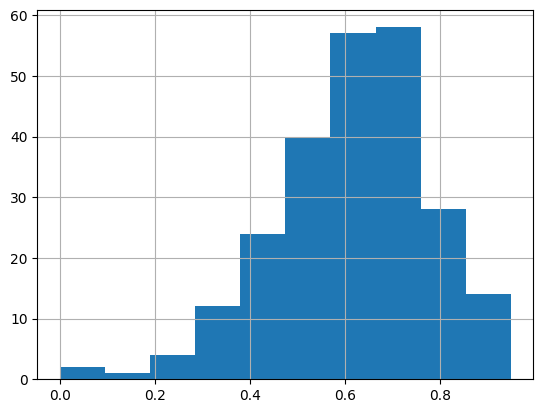

In [27]:
new_df = true_and_fake.transpose()

new_df_2 = new_df[new_df.Polarity == "Fake"]

new_df_2["LDHDD"].hist()

# distribution of LDHDD feature in fake news

<Axes: >

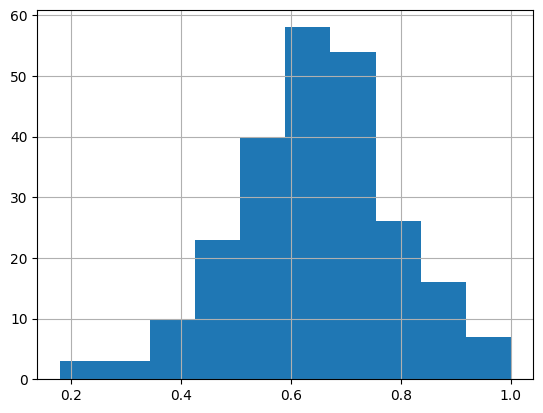

In [28]:
new_df = true_and_fake.transpose()

new_df_2 = new_df[new_df.Polarity == "True"]

new_df_2["LDHDD"].hist()

# distribution of LDHDD feature in fake news

<Axes: >

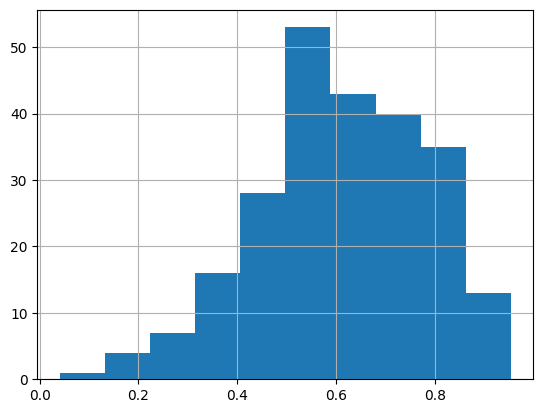

In [29]:
new_df = true_and_fake.transpose()

new_df_2 = new_df[new_df.Polarity == "Fake"]

new_df_2["LDTTRc"].hist()

# distribution of LDTTRc feature in fake news

<Axes: >

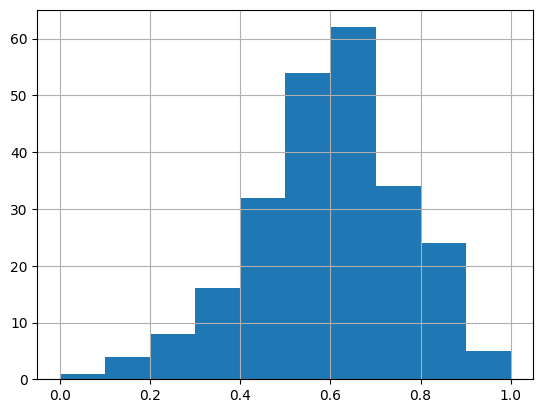

In [30]:
new_df = true_and_fake.transpose()

new_df_2 = new_df[new_df.Polarity == "True"]

new_df_2["LDTTRc"].hist()

Comparing the distributions we can see that the bulk of the true news values are already covered in the fake news distribution.

# Comparing distributions to determine how we will filter the dataset

In [31]:
texts_lexical_features = true_and_fake.drop(labels=['Shapiro pval Fake','Shapiro pval True'], axis = 1).transpose() #taking out the shapiro true/fake rows

In [54]:
all_ling_features = texts_lexical_features.to_csv("all_ling_features_normalized_together.csv", sep=',', index=False, encoding='utf-8')

LINGUISTIC FEATURE: DESPLd
Normal distribution in the FAKE text


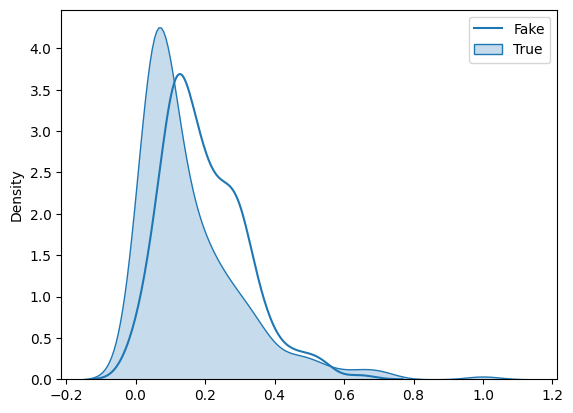

LINGUISTIC FEATURE: DESWLltd
Normal distribution in the FAKE text


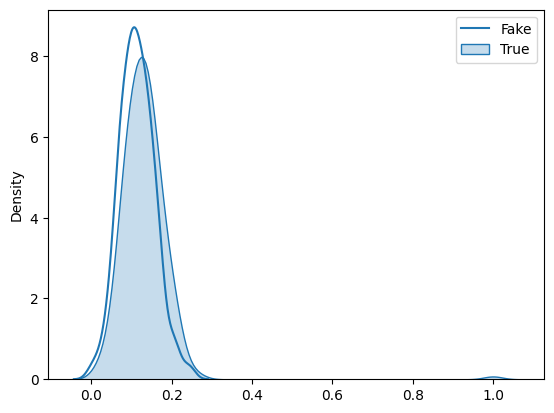

LINGUISTIC FEATURE: WORD_PROPERTY_WRDMEAc
Normal distribution in the FAKE text


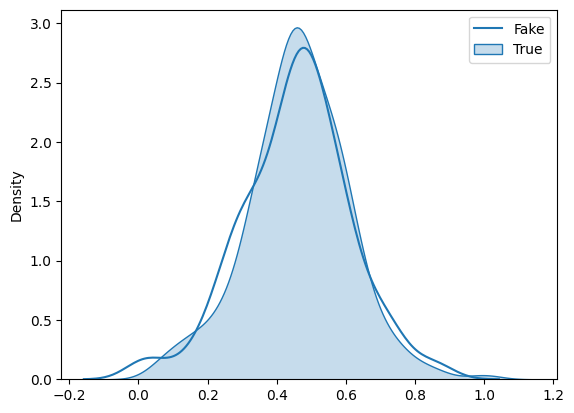

LINGUISTIC FEATURE: WORD_PROPERTY_WRDHYPn
Normal distribution in the FAKE text


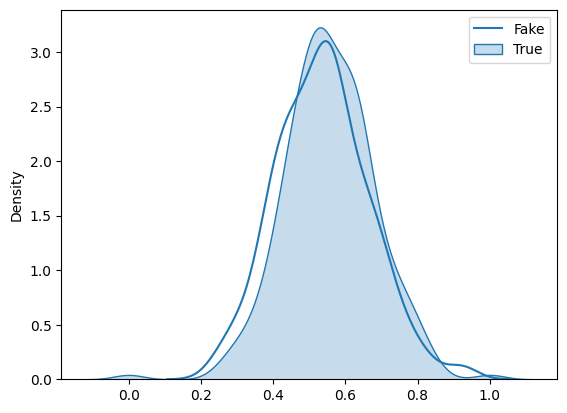

LINGUISTIC FEATURE: WORD_PROPERTY_AOA
Normal distribution in the FAKE text


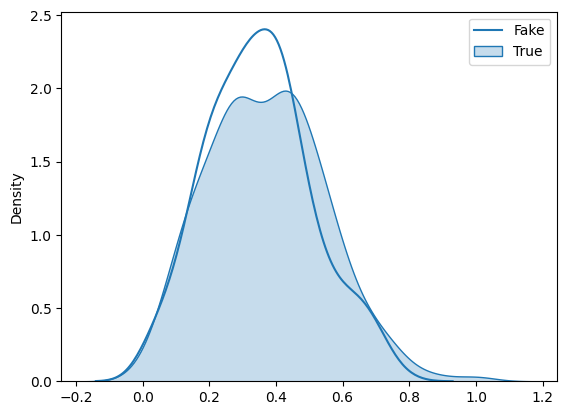

LINGUISTIC FEATURE: DESWLlt
Normal distributrion in the TRUE text


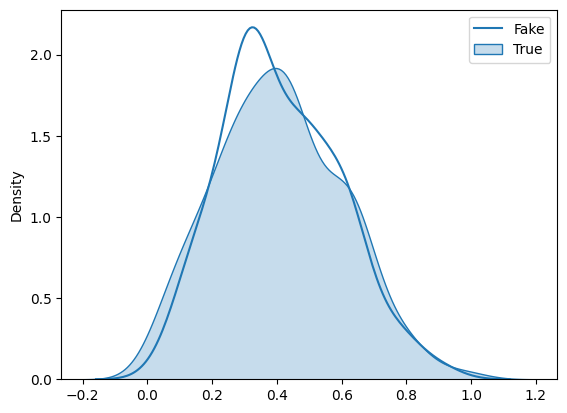

LINGUISTIC FEATURE: LDTTRc
Normal distributrion in the TRUE text


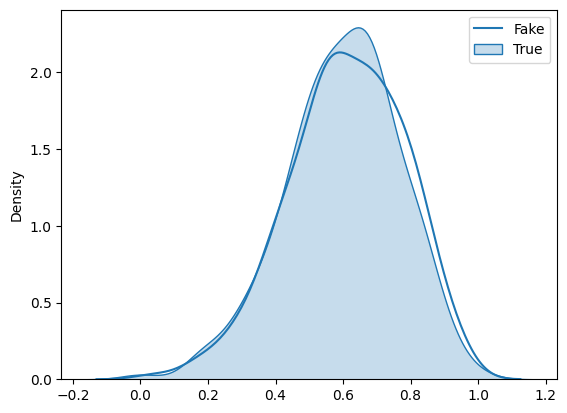

LINGUISTIC FEATURE: LDHDD
Normal distributrion in the TRUE text


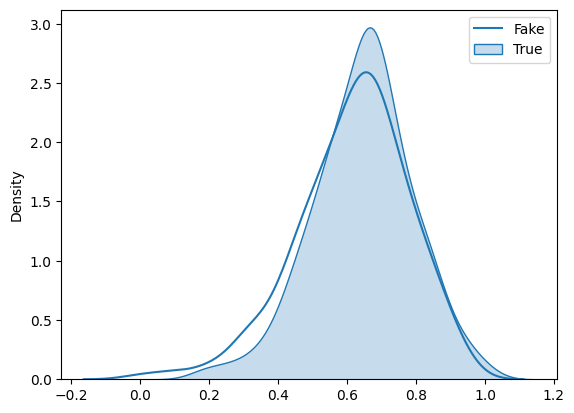

LINGUISTIC FEATURE: WORD_PROPERTY_WRDADJ
Normal distributrion in the TRUE text


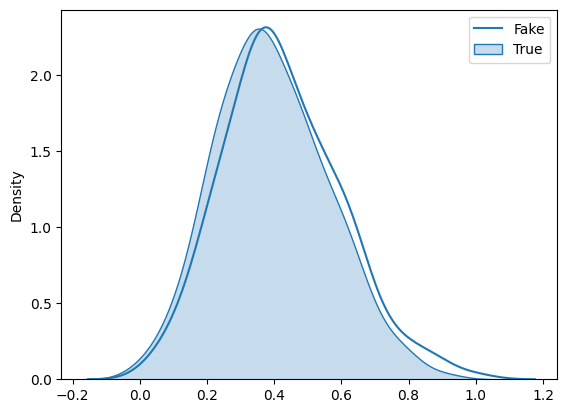

LINGUISTIC FEATURE: WORD_PROPERTY_WRDCNCc
Normal distributrion in the TRUE text


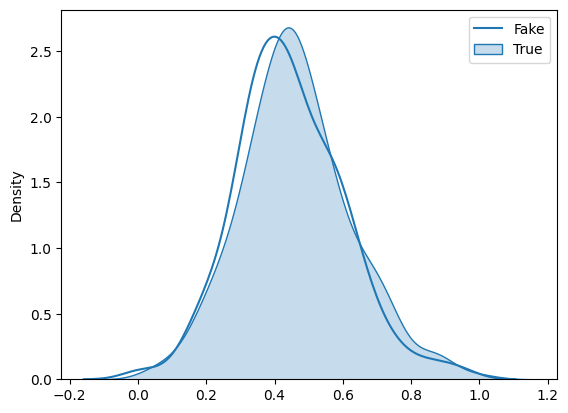

LINGUISTIC FEATURE: WORD_PROPERTY_WRDPOLc
Normal distributrion in the TRUE text


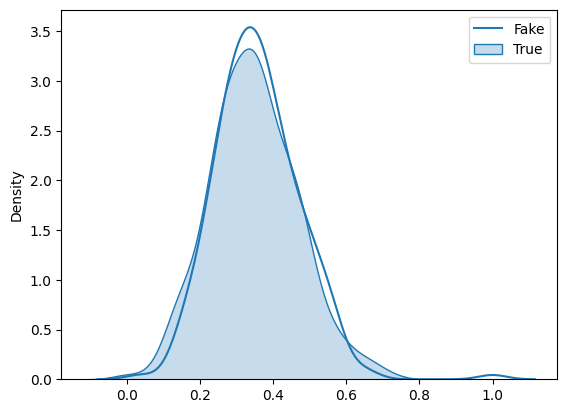

In [33]:
# plotting all the distributions of the features that follow regular distribution in either true or fake news

import matplotlib.pyplot as plt
import seaborn as sns

for item in list_of_features:

  print("LINGUISTIC FEATURE:", item)
  if item in features_true:
    print("Normal distributrion in the TRUE text")
  else:
    print("Normal distribution in the FAKE text")
  new_df = true_and_fake.transpose()
  target_FAKE = new_df[new_df['Polarity'] == "Fake"]
  target_TRUE = new_df[new_df['Polarity'] == "True"]


  sns.kdeplot(target_FAKE[[item]], color="grey")

  sns.kdeplot(target_TRUE[[item]], fill=True)
  plt.legend(labels = ["Fake", "True"])

  plt.show()





LINGUISTIC FEATURE: LDTTRa
Normal distribution in the FAKE text


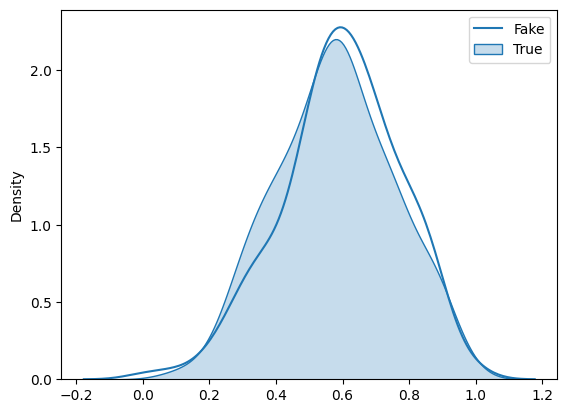

LINGUISTIC FEATURE: SYNNP
Normal distribution in the FAKE text


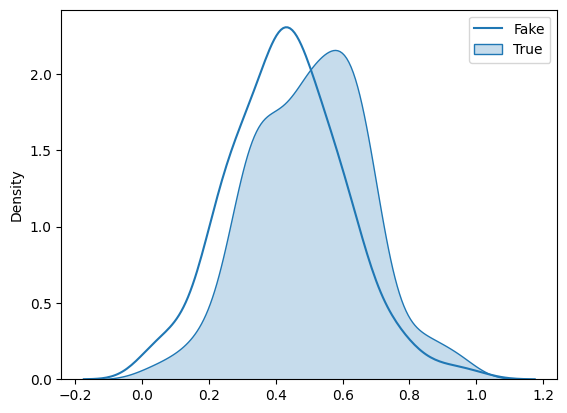

LINGUISTIC FEATURE: SYNMEDpos
Normal distribution in the FAKE text


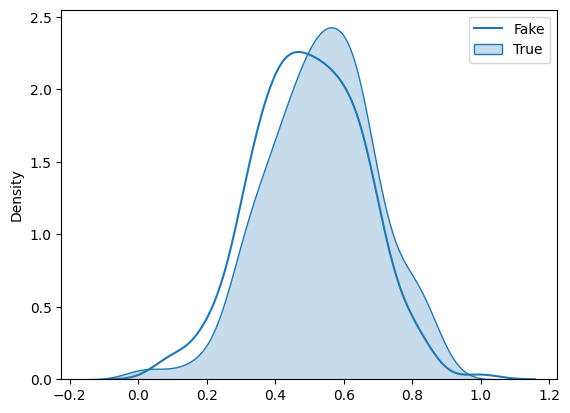

LINGUISTIC FEATURE: SYNSTRUTt
Normal distribution in the FAKE text


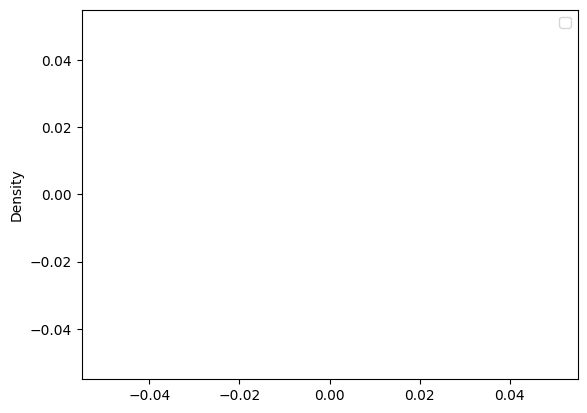

LINGUISTIC FEATURE: TOKEN_ATTRIBUTE_RATIO_EMAIL
Normal distribution in the FAKE text


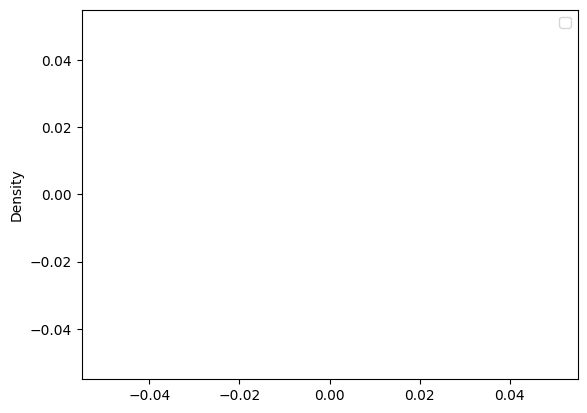

LINGUISTIC FEATURE: WORD_PROPERTY_WRDNOUN
Normal distribution in the FAKE text


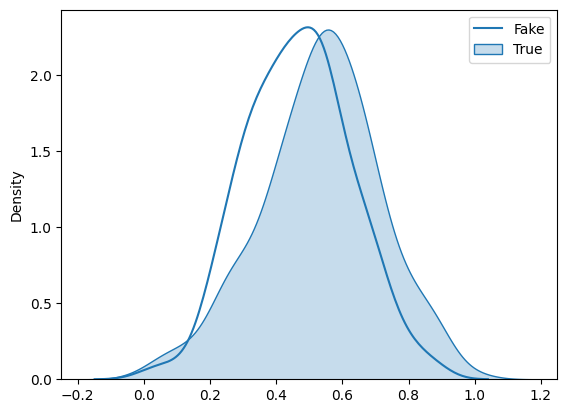

LINGUISTIC FEATURE: WORD_PROPERTY_WRDVERB
Normal distribution in the FAKE text


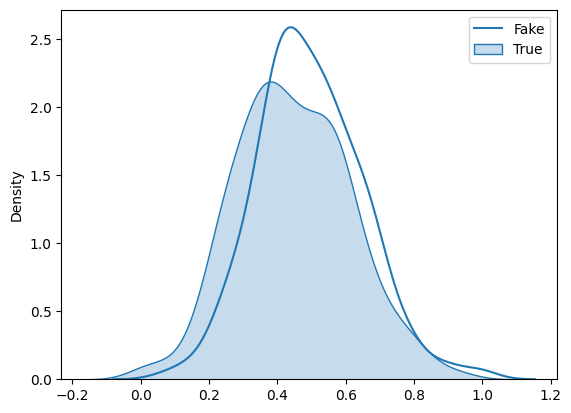

LINGUISTIC FEATURE: WORD_PROPERTY_WRDFRQc
Normal distribution in the FAKE text


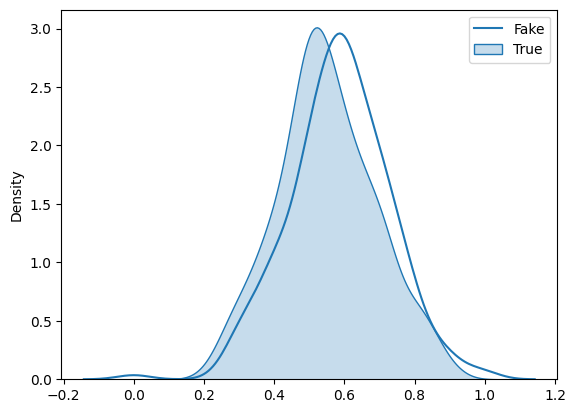

LINGUISTIC FEATURE: WORD_PROPERTY_WRDFRQa
Normal distribution in the FAKE text


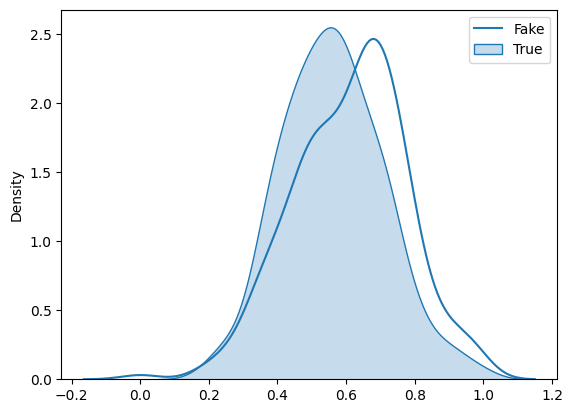

LINGUISTIC FEATURE: WORD_PROPERTY_WRDIMGc
Normal distribution in the FAKE text


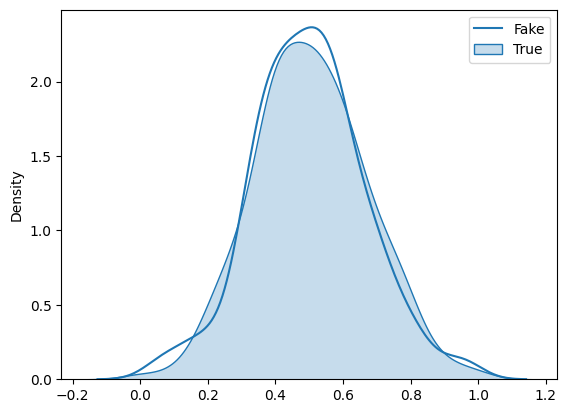

LINGUISTIC FEATURE: WORD_PROPERTY_WRDHYPnv
Normal distribution in the FAKE text


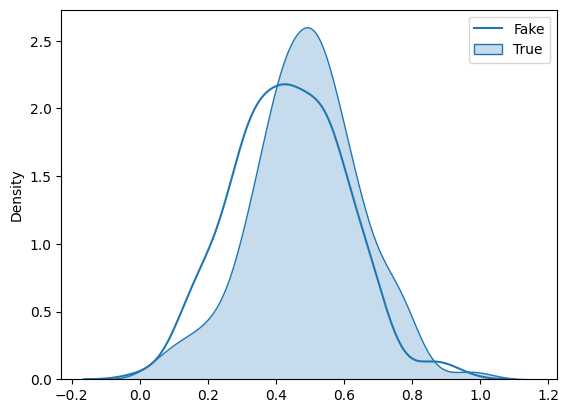

LINGUISTIC FEATURE: WORD_PROPERTY_CONCRETENESS
Normal distribution in the FAKE text


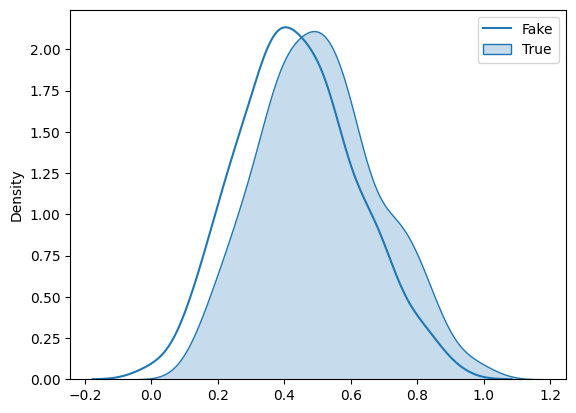

LINGUISTIC FEATURE: WORD_SET_INCIDENCE_C4_COMMON_WORDS
Normal distribution in the FAKE text


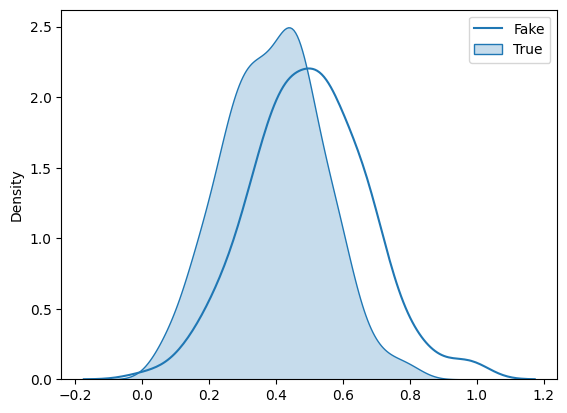

In [34]:
#plotting the distributions for the features that follow a normal distribution in both true and fake news
common_features_list = []

for ft in common_features.transpose():
  common_features_list.append(ft)

# print(len(common_features_list))

for item in common_features_list:

  print("LINGUISTIC FEATURE:", item)
  if item in features_true:
    print("Normal distributrion in the TRUE text")
  else:
    print("Normal distribution in the FAKE text")
  new_df = true_and_fake.transpose()
  target_FAKE = new_df[new_df['Polarity'] == "Fake"]
  target_TRUE = new_df[new_df['Polarity'] == "True"]


  sns.kdeplot(target_FAKE[[item]], color="grey")

  sns.kdeplot(target_TRUE[[item]], fill=True)
  plt.legend(labels = ["Fake", "True"])

  plt.show()

LINGUISTIC FEATURE: DESPLd
Normal distribution occurs in the FAKE text


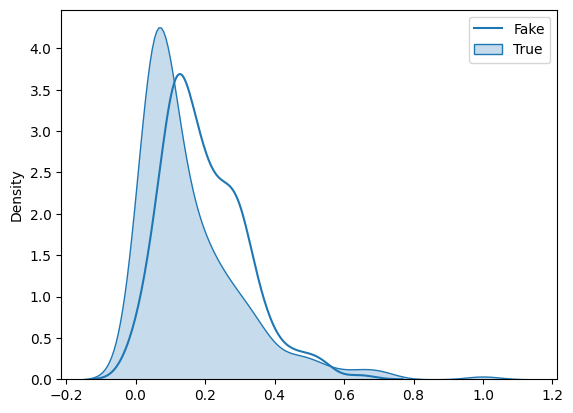

LINGUISTIC FEATURE: DESWLltd
Normal distribution occurs in the FAKE text


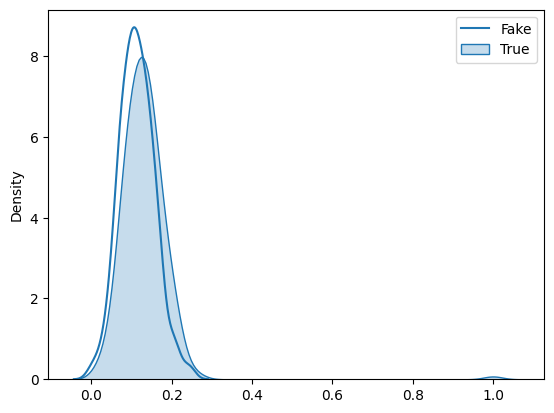

LINGUISTIC FEATURE: WORD_PROPERTY_WRDHYPn
Normal distribution occurs in the FAKE text


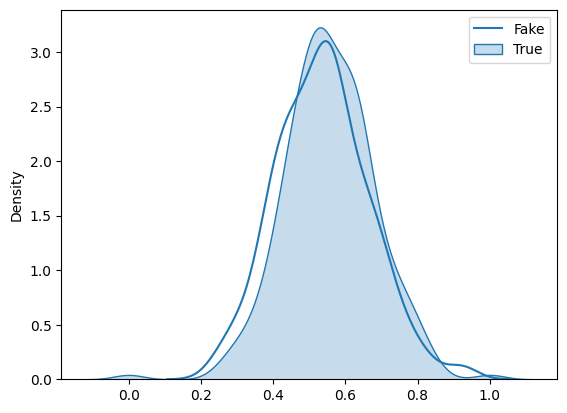

In [35]:
list_potentially_interesitng = ["DESPLd", "DESWLltd", "WORD_PROPERTY_WRDHYPn"]


for item in list_potentially_interesitng:
  print("LINGUISTIC FEATURE:", item)
  if item in features_true:
    print("Normal distributrion occurs in the TRUE text")
  else:
    print("Normal distribution occurs in the FAKE text")
  new_df = true_and_fake.transpose()
  target_FAKE = new_df[new_df['Polarity'] == "Fake"]
  target_TRUE = new_df[new_df['Polarity'] == "True"]


  sns.kdeplot(target_FAKE[[item]], color="grey")

  sns.kdeplot(target_TRUE[[item]], fill=True)
  plt.legend(labels = ["Fake", "True"])
  plt.show()



QUANTILES

In [36]:
lexical_fts_final = texts_lexical_features[["DESPLd", "DESWLltd", "WORD_PROPERTY_WRDHYPn", "Polarity"]]
lexical_fts_final

,DESPLd,DESWLltd,WORD_PROPERTY_WRDHYPn,Polarity
0,0.0,0.245928,0.404405,Fake
1,0.176471,0.054558,0.420646,Fake
2,0.235294,0.048796,0.561619,Fake
3,0.176471,0.052436,0.55882,Fake
4,0.294118,0.05562,0.666625,Fake
...,...,...,...,...
235,0.176471,0.080692,0.506349,True
236,0.037203,0.019553,0.455246,True
237,0.048029,0.113189,0.592211,True
238,0.352941,0.084673,0.492107,True


In [37]:
# plotting DESWLltd again for visual ref


# sns.kdeplot(target_FAKE[["DESWLltd"]], color="grey")

# sns.kdeplot(target_TRUE[["DESWLltd"]], fill=True)
# plt.legend(labels = ["Fake", "True"])
# plt.show()

In [38]:
#checking the amount of data that we could filter for the main feature and where it comes from

print("If we focused on DESWLltd alone \n\n")

DESWlltd_threshold = 0.12

# print("Mean value for DESLltd regardless of T/F", lexical_fts_final['DESWLltd'].mean())

print("Total amount of text:", lexical_fts_final.shape[0], "instances.")

print("Amount of text below {} DESWlltd:".format(DESWlltd_threshold), lexical_fts_final[lexical_fts_final['DESWLltd']< DESWlltd_threshold].shape[0], "instances.")

print("Amount of TRUE label text below {} DESWlltd:".format(DESWlltd_threshold), lexical_fts_final[(lexical_fts_final['Polarity']=='True') & (lexical_fts_final['DESWLltd']< DESWlltd_threshold)].shape[0], "instances.")

print("Amount of FAKE text below {} DESWlltd:".format(DESWlltd_threshold), lexical_fts_final[(lexical_fts_final['Polarity']=='Fake') & (lexical_fts_final['DESWLltd']< DESWlltd_threshold)].shape[0], "instances.")

If we focused on DESWLltd alone 


Total amount of text: 480 instances.
Amount of text below 0.12 DESWlltd: 243 instances.
Amount of TRUE label text below 0.12 DESWlltd: 104 instances.
Amount of FAKE text below 0.12 DESWlltd: 139 instances.


LINGUISTIC FEATURE: DESPLd
Normal distribution occurs in the FAKE text


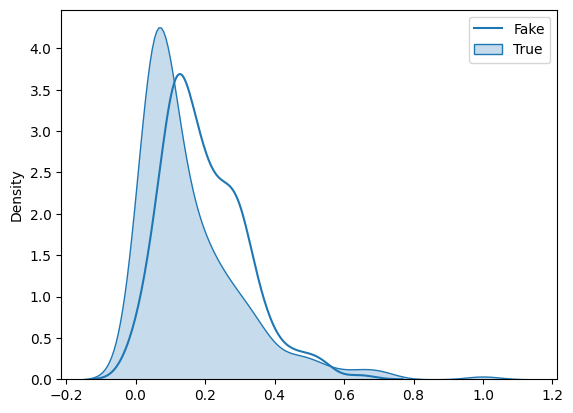

LINGUISTIC FEATURE: DESWLltd
Normal distribution occurs in the FAKE text


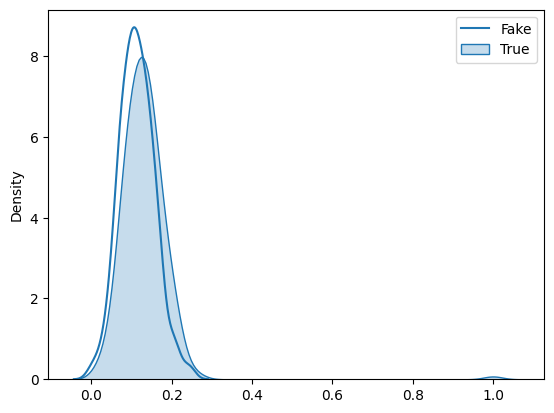

LINGUISTIC FEATURE: WORD_PROPERTY_WRDHYPn
Normal distribution occurs in the FAKE text


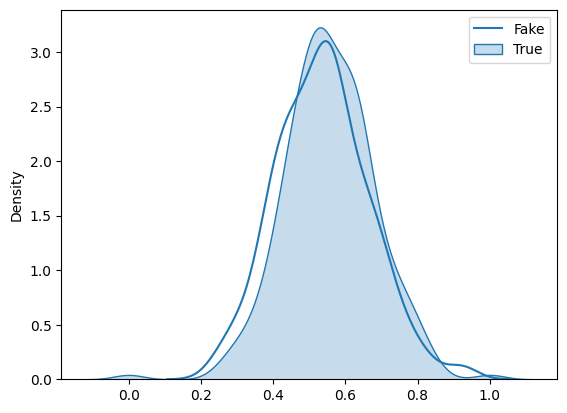

In [39]:
# plotting all the features again for visual ref


for item in list_potentially_interesitng:
  print("LINGUISTIC FEATURE:", item)
  if item in features_true:
    print("Normal distributrion occurs in the TRUE text")
  else:
    print("Normal distribution occurs in the FAKE text")
  new_df = true_and_fake.transpose()
  target_FAKE = new_df[new_df['Polarity'] == "Fake"]
  target_TRUE = new_df[new_df['Polarity'] == "True"]


  sns.kdeplot(target_FAKE[[item]], color="grey")

  sns.kdeplot(target_TRUE[[item]], fill=True)
  plt.legend(labels = ["Fake", "True"])
  plt.show()

In [40]:
# mean, standard value and potential target values for the linguistic features in the fake text
# targetting +- 2*std


DESWLltd_std = target_FAKE['DESWLltd'].std()
WORD_PROPERTY_WRDHYPn_std = target_FAKE['WORD_PROPERTY_WRDHYPn'].std()
DESPLd_std = target_FAKE['DESPLd'].std()


DESWLltd_mean = target_FAKE['DESWLltd'].mean()
WORD_PROPERTY_WRDHYPn_mean = target_FAKE['WORD_PROPERTY_WRDHYPn'].mean()
DESPLd_mean = target_FAKE['DESPLd'].mean()

value_target_DESWLltd = DESWLltd_mean - (2 * DESWLltd_std)
value_target_WORD_PROPERTY_WRDHYPn = WORD_PROPERTY_WRDHYPn_mean + (2 * WORD_PROPERTY_WRDHYPn_std)
value_target_DESPLd = DESPLd_mean - (2 * DESPLd_std)

print("Target values:\nDESWLltd: {} \nWORD_PROPERTY_WRDHYPn: {} \nDESPLd: {}".format(value_target_DESWLltd, value_target_WORD_PROPERTY_WRDHYPn, value_target_DESPLd))

Target values:
DESWLltd: 0.026298832191951282 
WORD_PROPERTY_WRDHYPn: 0.7930002355199453 
DESPLd: -0.038659530045286994


In [41]:
#filtering by these conditions only gives us one piece of data so moveing the target_values towards the mean we get a more sizeable list of texts we can use

# ideal_DESWLltd = (lexical_fts_final['DESWLltd']< value_target_DESWLltd)
# ideal_WORD_PROPERTY_WRDHYPn = (lexical_fts_final['WORD_PROPERTY_WRDHYPn'] > value_target_WORD_PROPERTY_WRDHYPn)
# ideal_DESPLd = (lexical_fts_final['DESPLd'] < value_target_DESPLd)

# count_ideal_scenario = lexical_fts_final[(ideal_DESWLltd) & (ideal_WORD_PROPERTY_WRDHYPn)].shape[0] + lexical_fts_final[(ideal_DESWLltd) & (ideal_DESPLd)].shape[0]

# print("In a perfect world we would like to use these conditions but we only get {} texts.".format(count_ideal_scenario))

In [42]:
# trying combinations of different indexes to get a more sizeable subset of the data

# rational behind the filtering: we would want to get text that is in the gap of the distributions between fake/real: text with features characteristic of real news that are lacking in the fake corpus

# that translates to low DESWLltd, low DESPLd but high WORD_PROPERTY_WRDHYPn

print("Trying more intentional filtering with DESWLltd as our primary linguistic feature but adding filtering according to DESPLd or WORD_PROPERTY_WRDHYPn values \n\n")

DESWlltd_threshold = 0.12
WORD_PROPERTY_WRDHYPn_threshold = 0.65
DESPLd_threshold = 0.1


condition_DESWLltd = (lexical_fts_final['DESWLltd'] < DESWlltd_threshold)
condition_WORD_PROPERTY_WRDHYPn = (lexical_fts_final['WORD_PROPERTY_WRDHYPn'] > WORD_PROPERTY_WRDHYPn_threshold)
condition_DESPLd = (lexical_fts_final['DESPLd'] < DESPLd_threshold)



print("Total amount of text:", lexical_fts_final.shape[0], "instances.")

print("Amount of text below {} DESWLltd:".format(DESWlltd_threshold), lexical_fts_final[condition_DESWLltd].shape[0], "instances.")

print("Amount of text below {} DESWLltd and above {} WORD_PROPERTY_WRDHYPn:".format(DESWlltd_threshold,WORD_PROPERTY_WRDHYPn_threshold), lexical_fts_final[(condition_DESWLltd) & (condition_WORD_PROPERTY_WRDHYPn)].shape[0])

print("Amount of text below {} DESWLltd and above {} DESPLd:".format(DESWlltd_threshold,DESPLd_threshold), lexical_fts_final[(condition_DESWLltd) & (condition_DESPLd)].shape[0])


count = lexical_fts_final[((condition_DESWLltd) & (condition_WORD_PROPERTY_WRDHYPn)) | ((condition_DESWLltd) & (condition_DESPLd))].shape[0]

print("Total amount for intentional filtering:", count)


Trying more intentional filtering with DESWLltd as our primary linguistic feature but adding filtering according to DESPLd or WORD_PROPERTY_WRDHYPn values 


Total amount of text: 480 instances.
Amount of text below 0.12 DESWLltd: 243 instances.
Amount of text below 0.12 DESWLltd and above 0.65 WORD_PROPERTY_WRDHYPn: 51
Amount of text below 0.12 DESWLltd and above 0.1 DESPLd: 58
Total amount for intentional filtering: 94


In [43]:
#performing the general filtering for the top/bottom 25 % of text for each feature individually

# we will probably not use this however

list_index_text_WORD_PROPERTY_WRDHYPn = []
list_index_text_DESPLd = []
list_index_text_DESWLltd = []

for col in lexical_fts_final:
  if col == "WORD_PROPERTY_WRDHYPn":
    first_25 = lexical_fts_final.sort_values([col], ascending=[True])[:120]
    for row in first_25.index:

      polarity_val = first_25["Polarity"]
      tuple_val = (row, polarity_val)
      list_index_text_WORD_PROPERTY_WRDHYPn.append(tuple_val)

  elif col == "DESWLltd":
    first_25 = lexical_fts_final.sort_values([col], ascending=[True])[:120]
    for row in first_25.index:

      polarity_val = first_25["Polarity"]
      tuple_val = (row, polarity_val)
      list_index_text_DESWLltd.append(tuple_val)


  else:

    first_25 = lexical_fts_final.sort_values([col], ascending=[False])[:120]

    for row in first_25.index:

      polarity_val = first_25["Polarity"]

      tuple_val = (row, polarity_val)

      if col == "DESPLd":
        list_index_text_DESPLd.append(tuple_val)



# print("WORD_PROPERTY_WRDHYPn list of indeces", list_index_text_WORD_PROPERTY_WRDHYPn, "\n\n\n")
# print("WORD_PROPERTY_DESPLd list of indeces", list_index_text_DESPLd, "\n\n\n")
# print("WORD_PROPERTY_DESWLltd list of indeces", list_index_text_DESWLltd, "\n\n\n")


Transforming lexical_fts_final to binary polarity to use in the regression model


In [44]:
lexical_fts_final.Polarity[lexical_fts_final.Polarity == 'Fake'] = 0
lexical_fts_final.Polarity[lexical_fts_final.Polarity == 'True'] = 1

C:\Users\alber\AppData\Local\Temp\ipykernel_15060\2742508046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lexical_fts_final.Polarity[lexical_fts_final.Polarity == 'Fake'] = 0
C:\Users\alber\AppData\Local\Temp\ipykernel_15060\2742508046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lexical_fts_final.Polarity[lexical_fts_final.Polarity == 'True'] = 1


In [45]:
lexical_fts_final # fake label = 0, true label = 1

,DESPLd,DESWLltd,WORD_PROPERTY_WRDHYPn,Polarity
0,0.0,0.245928,0.404405,0
1,0.176471,0.054558,0.420646,0
2,0.235294,0.048796,0.561619,0
3,0.176471,0.052436,0.55882,0
4,0.294118,0.05562,0.666625,0
...,...,...,...,...
235,0.176471,0.080692,0.506349,1
236,0.037203,0.019553,0.455246,1
237,0.048029,0.113189,0.592211,1
238,0.352941,0.084673,0.492107,1


Exporting the new table into a csv file

In [55]:

lexical_fts_final.to_csv("three_final_features_normalized_together.csv", sep=',', index=False, encoding='utf-8')

Continuing in Logistic Regression Notebook

Filtering the true/fake

In [47]:
# lexical_fts_final # index starts at 0

In [48]:
# merging the conditions into two tables

# filter_1 = lexical_fts_final[(condition_DESWLltd) & (condition_WORD_PROPERTY_WRDHYPn)]

# filter_2 = lexical_fts_final[(condition_DESWLltd) & (condition_DESPLd)]

# for row in filter_1.index:
#   if row in filter_2.index:
#     print("Found")
#   else:
#     print("Not found")

In [49]:
# filter_1

In [50]:
# filter_2

In [51]:
#Putting the indexes and polarity of both tables into a list of tuples

# all the indexes are from true news so no need to get the polarity

# we can verify that comparing the lenght of the list with the lenght of the count as well

# filtered_indexes = []

# for row in filter_1.index:

#   # index = row + 1   indexing starts at 0

#   filtered_indexes.append(row)

# for row in filter_2.index:
#   if row not in filtered_indexes:

#     # index = row + 1

#     filtered_indexes.append(row)

# print("List of indexes and polarity", filtered_indexes)

# print("Cheking the lengh is equal to the count", len(filtered_indexes))

In [52]:
#indexing starts at 0 so the index 1 is the second text

# with open ("list_indexes_features.txt" , "w") as f:
#   f.write("CLARIFICATION: indexing starts at 0 so the index 1 is the second text\n")
#   for item in filtered_indexes:
#     f.write(str(item) + "\n")



In [53]:
# #Putting the indexes and polarity of both tables into a list of tuples

# # if we had both polarities

# filtered_indexes = []

# for row in filter_1.index:

#   polarity_val = filter_1["Polarity"]
#   tuple_val = (row, polarity_val)
#   # print(tuple_val)
#   filtered_indexes.append(tuple_val)

# for row in filter_2.index:

#   polarity_val = filter_2["Polarity"]
#   tuple_val = (row, polarity_val)
#   filtered_indexes.append(tuple_val)

# print("List of indexes and polarity", filtered_indexes)

# print("Cheking the lengh is equal to the count", len(filtered_indexes))